In [23]:
import pandas as pd
patients_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/PATIENTS.csv')
diagnoses_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/DIAGNOSES_ICD.csv')
outputevents_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/OUTPUTEVENTS.csv')
prescriptions_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/PRESCRIPTIONS.csv')
admissions_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/ADMISSIONS.csv')
icustays_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/ICUSTAYS.csv')

# Merge patients with diagnoses using subject_id
merged_data = pd.merge(patients_df, diagnoses_df, on='subject_id', how='inner')

# Merge patients with output events using subject_id
patients_with_output_events = patients_df.merge(outputevents_df, on='subject_id', how='inner')

# Analyze and process output events as needed
# For example, you can calculate statistics or identify patterns related to output events

# Example: Calculate the average value of a specific output measurement
average_output_value = patients_with_output_events['value'].mean()
print(f'Average Output Value: {average_output_value}')
admissions_df.columns

Average Output Value: 165.48682795698926


Index(['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'religion',
       'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
       'hospital_expire_flag', 'has_chartevents_data'],
      dtype='object')

In [3]:
# Merge patients_df and icustays_df based on the 'subject_id' column
merged_data_patient_icu = pd.merge(patients_df, icustays_df, on='subject_id', how='inner')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sqlalchemy import create_engine

In [5]:
antibiotic_list = [
    'Cefazolin', 'Cefepime', 'Ceftazidime', 'Ciprofloxacin', 'Clindamycin',
    'Erythromycin', 'Gentamicin', 'Levofloxacin', 'Metronidazole', 'Moxifloxacin',
    'Piperacillin', 'Rifampin', 'Tobramycin', 'Vancomycin', 'Amikacin',
    'Ampicillin', 'Azithromycin', 'Aztreonam'
]

In [29]:
# Filter prescriptions_df based on antibiotic_list
antibiotic_prescriptions = prescriptions_df[prescriptions_df['drug'].isin(antibiotic_list)]
antibiotic_prescriptions

,row_id,subject_id,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
26,59648,42275,128293,290478.0,2135-10-25 00:00:00,2135-10-26 00:00:00,MAIN,Azithromycin,Azithromycin,Azithromycin,ZITHR250,26721.0,5.976231e+10,250 mg Tab,500,mg,2,TAB,PO
27,59649,42275,128293,290478.0,2135-10-25 00:00:00,2135-10-25 00:00:00,MAIN,Azithromycin,Azithromycin,Azithromycin,ZITHR250,26721.0,5.976231e+10,250 mg Tab,250,mg,1,TAB,PO
33,59655,42275,128293,290478.0,2135-10-26 00:00:00,2135-10-27 00:00:00,MAIN,Azithromycin,Azithromycin,Azithromycin,ZITHR250,26721.0,5.976231e+10,250 mg Tab,500,mg,2,TAB,PO
88,86749,43735,112662,NaN,2128-11-08 00:00:00,2128-11-09 00:00:00,MAIN,Vancomycin,NaN,NaN,VANC1F,43952.0,3.383552e+08,1g Frozen Bag,1000,mg,1,BAG,IV
91,86752,43735,112662,NaN,2128-11-08 00:00:00,2128-11-09 00:00:00,MAIN,Vancomycin,NaN,NaN,VANC1F,43952.0,3.383552e+08,1g Frozen Bag,1000,mg,1,BAG,IV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,3591254,42066,171628,NaN,2112-02-04 00:00:00,2112-02-07 00:00:00,MAIN,Vancomycin,NaN,NaN,VANC500I,9331.0,4.094332e+08,500mg Vial,750,mg,1.5,VIAL,IV
10288,3591265,42066,171628,244243.0,2112-02-07 00:00:00,2112-02-08 00:00:00,MAIN,Vancomycin,NaN,NaN,VANC500I,9331.0,4.094332e+08,500mg Vial,750,mg,1.5,VIAL,IV
10316,3591950,42066,171628,244243.0,2112-02-07 00:00:00,2112-02-07 00:00:00,MAIN,Vancomycin,Vancomycin,Vancomycin,VANC500I,9331.0,4.094332e+08,500mg Vial,750,mg,1.5,VIAL,IV
10360,3609880,42430,100969,210474.0,2142-11-28 00:00:00,2142-11-28 00:00:00,MAIN,Vancomycin,NaN,NaN,VANC1F,43952.0,3.383552e+08,1g Frozen Bag,1000,mg,1,BAG,IV


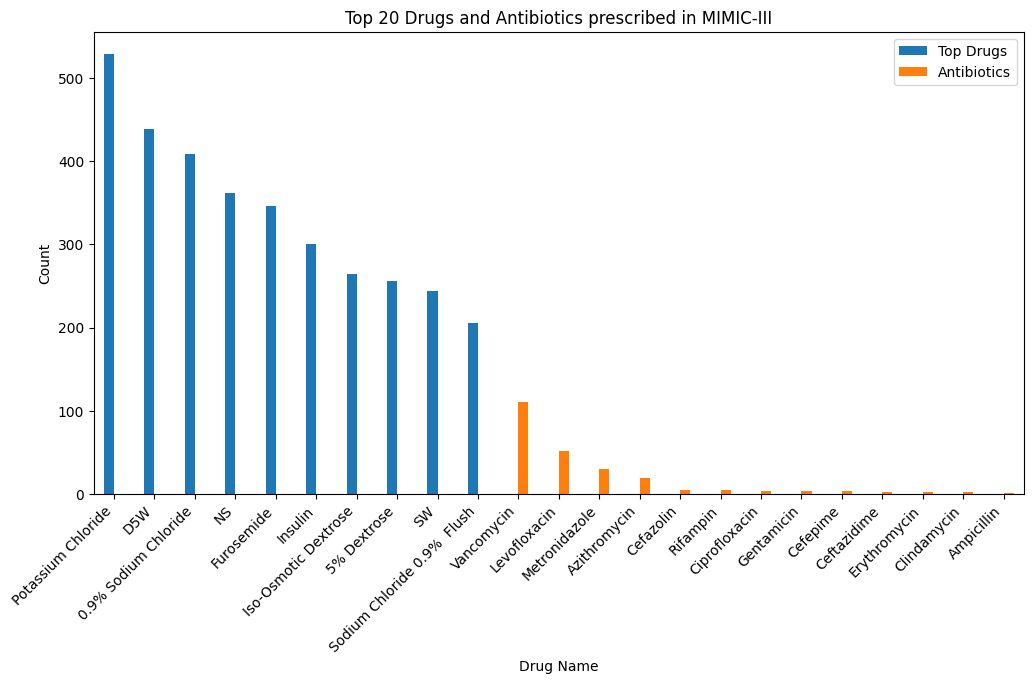

drug
Vancomycin       111
Levofloxacin      52
Metronidazole     30
Azithromycin      19
Cefazolin          5
Name: count, dtype: int64

In [21]:
# Find drugs in prescriptions_df that are not in the antibiotic list
non_antibiotics = prescriptions_df[~prescriptions_df['drug'].isin(antibiotic_list)]['drug'].value_counts()

# Find counts of antibiotics in prescriptions_df
antibiotics = prescriptions_df[prescriptions_df['drug'].isin(antibiotic_list)]['drug'].value_counts()

# Choose the top N drugs to display
top_n = 10  # Adjust the number as needed
top_drugs = non_antibiotics.head(top_n)

# Combine top N drugs and antibiotics into a single DataFrame
combined_counts = pd.concat([top_drugs, antibiotics], axis=1, keys=['Top Drugs', 'Antibiotics'])

# Create a bar chart with rotated x-axis labels
plt.figure(figsize=(12, 6))
ax = combined_counts.plot(kind='bar', ax=plt.gca())
ax.set_xticklabels(combined_counts.index, rotation=45, ha='right')
plt.title('Top 20 Drugs and Antibiotics prescribed in MIMIC-III')
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.show()

antibiotics.head()

In [11]:
# Make a copy of the DataFrame
antibiotic_prescriptions_copy = antibiotic_prescriptions.copy()

# Ensure 'startdate' column is in datetime format in the copy
antibiotic_prescriptions_copy['startdate'] = pd.to_datetime(antibiotic_prescriptions_copy['startdate'])

# Group by month and count the number of prescriptions per month
antibiotic_usage_over_time = antibiotic_prescriptions_copy.groupby(antibiotic_prescriptions_copy['startdate'].dt.to_period('M')).size()

antibiotic_usage_over_time.head()

startdate
2104-09    3
2104-10    1
2105-05    2
2105-06    9
2107-01    9
Freq: M, dtype: int64

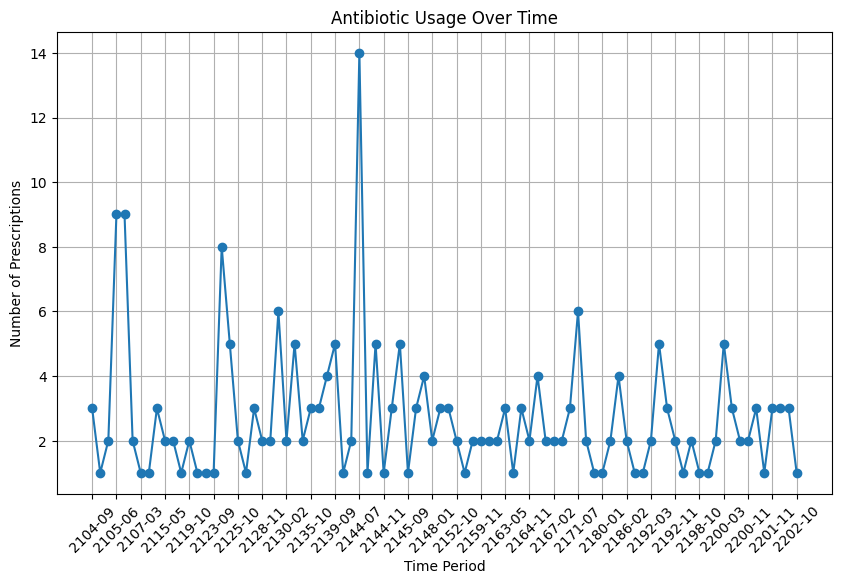

In [44]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
# Convert the Period index to strings
antibiotic_usage_over_time.index = antibiotic_usage_over_time.index.astype(str)

# Reduce the frequency of x-tick labels (display every 3 months)
N = 3
plt.figure(figsize=(10, 6))
plt.plot(antibiotic_usage_over_time.index, antibiotic_usage_over_time.values, marker='o')
plt.title('Antibiotic Usage Over Time')
plt.xlabel('Time Period')
plt.ylabel('Number of Prescriptions')
plt.xticks(np.arange(0, len(antibiotic_usage_over_time.index), N), antibiotic_usage_over_time.index[::N], rotation=45)
plt.grid(True)
plt.show()

In [16]:
patients_df = patients_df[~patients_df['subject_id'].duplicated()]
diagnoses_df = diagnoses_df[~diagnoses_df['subject_id'].duplicated()]

merged_data = pd.merge(antibiotic_prescriptions_copy, patients_df, on='subject_id', how='inner')
merged_data = pd.merge(merged_data, diagnoses_df, on='subject_id', how='inner')
merged_data.columns

Index(['row_id_x', 'subject_id', 'hadm_id_x', 'icustay_id', 'startdate',
       'enddate', 'drug_type', 'drug', 'drug_name_poe', 'drug_name_generic',
       'formulary_drug_cd', 'gsn', 'ndc', 'prod_strength', 'dose_val_rx',
       'dose_unit_rx', 'form_val_disp', 'form_unit_disp', 'route', 'row_id_y',
       'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn', 'expire_flag', 'row_id',
       'hadm_id_y', 'seq_num', 'icd9_code'],
      dtype='object')

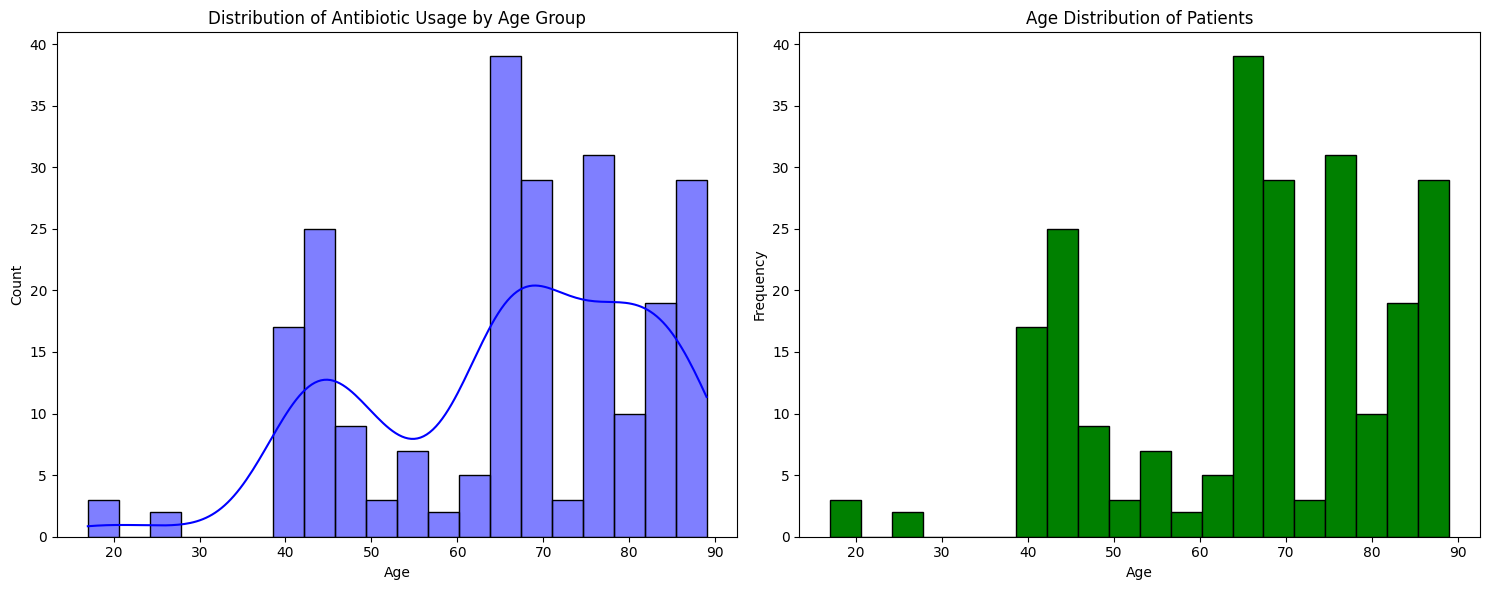

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

# Assuming merged_data is your DataFrame
merged_data['dob'] = pd.to_datetime(merged_data['dob'])
merged_data['age'] = (merged_data['startdate'].dt.year - merged_data['dob'].dt.year)

# Set a threshold for treating values as missing
age_threshold = 110
merged_data['age'] = merged_data.apply(lambda row: np.nan if (pd.isna(row['age']) or (datetime.now().year - row['dob'].year) > age_threshold) else row['age'], axis=1)

# Plot the histograms side by side
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(x='age', data=merged_data, bins=20, kde=True, color='blue')
plt.title('Distribution of Antibiotic Usage by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(merged_data['age'].dropna(), bins=20, edgecolor='k', color='green')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


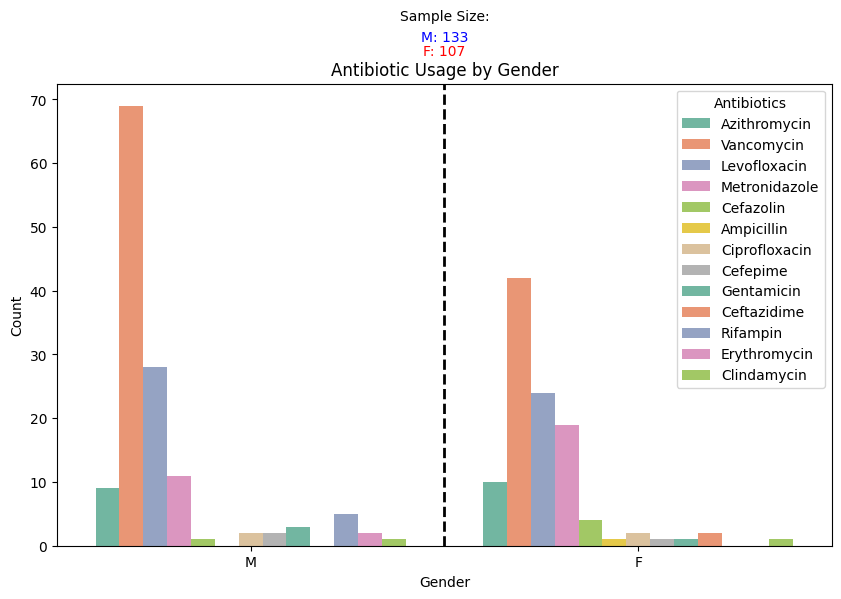

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender-based antibiotic usage with adjusted color palette and vertical line
plt.figure(figsize=(10, 6))

# Countplot
ax = sns.countplot(data=merged_data, x='gender', hue='drug', palette='Set2')


# Vertical line to separate males and females
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=2)

# Add sample size annotation in black
male_count = merged_data[merged_data['gender'] == 'M'].shape[0]
female_count = merged_data[merged_data['gender'] == 'F'].shape[0]
ax.text(0.5, max(ax.patches, key=lambda x: x.get_height()).get_height() + 0.15 * ax.get_ylim()[1],
        f'Sample Size:\n',
        color='black',  # Sample size text color
        ha='center')

# Add male annotation in blue
ax.text(0.5, max(ax.patches, key=lambda x: x.get_height()).get_height() + 0.14 * ax.get_ylim()[1],
        f'M: {male_count}', 
        color='blue',  # Male text color
        ha='center')

# Add female annotation in red
ax.text(0.5, max(ax.patches, key=lambda x: x.get_height()).get_height() + 0.11 * ax.get_ylim()[1],
        f'F: {female_count}', 
        color='red',  # Female text color
        ha='center')

plt.title('Antibiotic Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Antibiotics')

plt.show()

In [28]:
admissions_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/ADMISSIONS.csv')
patients_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/PATIENTS.csv')

merged_df_admin = pd.merge(admissions_df[['subject_id', 'hadm_id', 'admission_type']], 
                     patients_df[['subject_id']], 
                     on='subject_id', 
                     how='inner')

# Merge with prescriptions
merged_df_admin = pd.merge(merged_df_admin, 
                     prescriptions_df[['subject_id', 'hadm_id', 'is_antibiotic']], 
                     on=['subject_id', 'hadm_id'], 
                     how='inner')

KeyError: "['is_antibiotic'] not in index"